# **Pré-Processamento**

In [146]:
#Pre-Processamento

import pandas as pd

df_1 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte1.csv', sep= ';')
df_2 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte2.csv', sep= ';')
df_3 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte1.csv', sep= ';')
df_4 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte2.csv', sep= ';')

df = pd.concat([df_1, df_2, df_3, df_4])
df = df[df['regiao']=='Brasil']
df = df[['data','obitosNovos']]
df['data'] = pd.to_datetime(df["data"])
df.rename(columns={'obitosNovos':'obitos'}, inplace=True)
df.to_csv('data/covid_br_obitos.csv', sep= ';', index=False)

# **Extrair tendência, sazonalidade e resíduo**

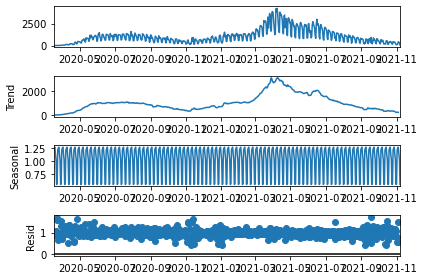

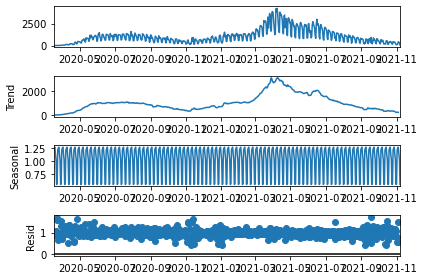

In [147]:
#Extrair tendencia, sazonalidade e residuo 
import pandas as pd
import statsmodels.tsa.api as sm
df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df.set_index('data',inplace = True)
df = df[df['obitos']>0]
df = df.asfreq(freq= 'D')
decompose = sm.seasonal_decompose(df, model= 'multiplicative', period= 7, two_sided= True, extrapolate_trend= 0)
decompose.plot()

# **Teste de Estacionaridade**

## **Série Original**

In [148]:
#Teste de estacionaridade
import pandas as pd
import statsmodels.tsa.api as sm

fuller = sm.adfuller(x= df)
fuller_serie = pd.Series(fuller[0:4], index=['Teste Estatístico Dickey FUller', 'Valor-P', 'Lags', 'Número de Observações'])    #lags auto-correlacao
fuller_serie = round(fuller_serie, 4)
for key, value in fuller[4].items():
    fuller_serie['Valores Críticos (%s)'%key] = value.round(4)
fuller_serie
#Dickey FUller pressupoe que a série é não estacionária
#p-valor se menor que valor criticos a série é estacionária

Teste Estatístico Dickey FUller     -1.9946
Valor-P                              0.2890
Lags                                17.0000
Número de Observações              583.0000
Valores Críticos (1%)               -3.4416
Valores Críticos (5%)               -2.8665
Valores Críticos (10%)              -2.5694
dtype: float64

In [149]:
#Teste KPSS 
import pandas as pd
import statsmodels.tsa.api as sm

kp = sm.kpss(x= df)
kp_serie = pd.Series(kp[0:3], index = ['Teste KPSS', 'P Valor', 'Lags'])    #lags auto-correlacao
kp_serie = round(kp_serie,4)

for key, value in kp[3].items():
    kp_serie['Valores Críticos (%s)'%key] = value

kp_serie

# O teste KPSS assume que a série é estacionária, se o valor p for menor que os valores Criticos a série é não-estacionária


C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\stattools.py:1998: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Teste KPSS                  0.7978
P Valor                     0.0100
Lags                       15.0000
Valores Críticos (10%)      0.3470
Valores Críticos (5%)       0.4630
Valores Críticos (2.5%)     0.5740
Valores Críticos (1%)       0.7390
dtype: float64

## **Primeira Diferenciação**

<AxesSubplot:xlabel='data'>

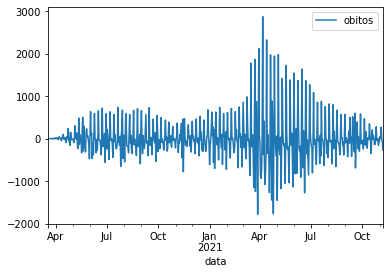

In [150]:
#Primeira Diferenciação
prim_dif = df.diff().dropna()
prim_dif.plot()

In [151]:
#Teste Primeira Diferenciação

#Teste de estacionaridade
import pandas as pd
import statsmodels.tsa.api as sm

fuller_prim = sm.adfuller(x= prim_dif)
fuller_prim_serie = pd.Series(fuller_prim[0:4], index=['Teste Estatístico Dickey FUller', 'Valor-P', 'Lags', 'Número de Observações'])    #lags auto-correlacao
fuller_prim_serie = round(fuller_prim_serie, 4)
for key, value in fuller[4].items():
    fuller_prim_serie['Valores Críticos (%s)'%key] = value.round(4)
fuller_prim_serie
#Dickey FUller pressupoe que a série é não estacionária
#p-valor se menor que valor criticos a série é estacionária


Teste Estatístico Dickey FUller     -4.4515
Valor-P                              0.0002
Lags                                19.0000
Número de Observações              580.0000
Valores Críticos (1%)               -3.4416
Valores Críticos (5%)               -2.8665
Valores Críticos (10%)              -2.5694
dtype: float64

In [152]:
#Teste KPSS 
import pandas as pd
import statsmodels.tsa.api as sm

kp_prim = sm.kpss(x= prim_dif)
kp_prim_serie = pd.Series(kp_prim[0:3], index = ['Teste KPSS', 'P Valor', 'Lags'])    #lags auto-correlacao
kp_prim_serie = round(kp_prim_serie,4)

for key, value in kp[3].items():
    kp_prim_serie['Valores Críticos (%s)'%key] = value

kp_prim_serie

# O teste KPSS assume que a série é estacionária, se o valor p for menor que os valores Criticos a série é não-estacionária


C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Teste KPSS                  0.162
P Valor                     0.100
Lags                       59.000
Valores Críticos (10%)      0.347
Valores Críticos (5%)       0.463
Valores Críticos (2.5%)     0.574
Valores Críticos (1%)       0.739
dtype: float64

## **Segunda Diferenciação**

<AxesSubplot:xlabel='data'>

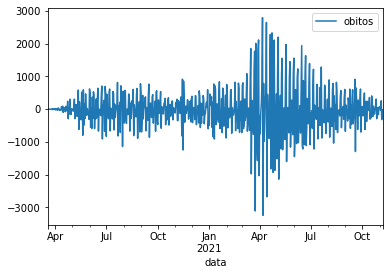

In [153]:
#Segunda Diferenciação
sec_dif = prim_dif.diff().dropna()
sec_dif.plot()

In [154]:
#Teste Segunda Diferenciação

#Teste de estacionaridade
import pandas as pd
import statsmodels.tsa.api as sm

fuller_sec = sm.adfuller(x= sec_dif)
fuller_sec_serie = pd.Series(fuller_sec[0:4], index=['Teste Estatístico Dickey FUller', 'Valor-P', 'Lags', 'Número de Observações'])    #lags auto-correlacao
fuller_sec_serie = round(fuller_sec_serie, 4)
for key, value in fuller[4].items():
    fuller_sec_serie['Valores Críticos (%s)'%key] = value.round(4)
fuller_sec_serie
#Dickey FUller pressupoe que a série é não estacionária
#p-valor se menor que valor criticos a série é estacionária

Teste Estatístico Dickey FUller    -10.5281
Valor-P                              0.0000
Lags                                19.0000
Número de Observações              579.0000
Valores Críticos (1%)               -3.4416
Valores Críticos (5%)               -2.8665
Valores Críticos (10%)              -2.5694
dtype: float64

In [155]:
#Teste KPSS 
import pandas as pd
import statsmodels.tsa.api as sm

kp_sec = sm.kpss(x= sec_dif)
kp_sec_serie = pd.Series(kp_sec[0:3], index = ['Teste KPSS', 'P Valor', 'Lags'])    #lags auto-correlacao
kp_sec_serie = round(kp_sec_serie,4)

for key, value in kp[3].items():
    kp_sec_serie['Valores Críticos (%s)'%key] = value

kp_sec_serie

# O teste KPSS assume que a série é estacionária, se o valor p for menor que os valores Criticos a série é não-estacionária


C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Teste KPSS                 0.0034
P Valor                    0.1000
Lags                       4.0000
Valores Críticos (10%)     0.3470
Valores Críticos (5%)      0.4630
Valores Críticos (2.5%)    0.5740
Valores Críticos (1%)      0.7390
dtype: float64

# **Autocorrelação e Correlação Parcial**

## **Série Original**

C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


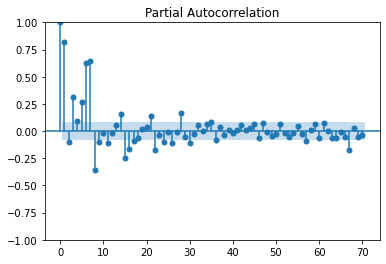

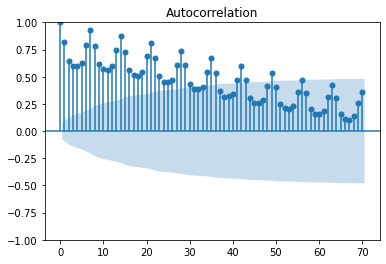

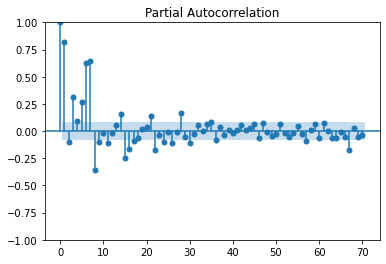

In [156]:
import statsmodels.graphics.tsaplots as sm_graph

sm_graph.plot_acf(df, lags=70)
sm_graph.plot_pacf(df, lags=70)

## **Segunda Diferenciação**

C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


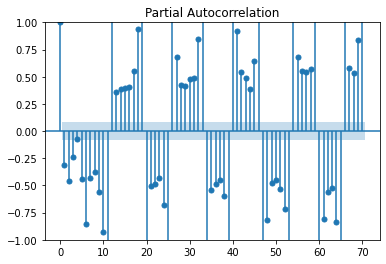

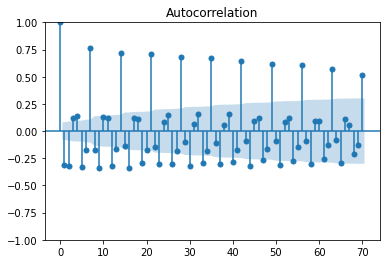

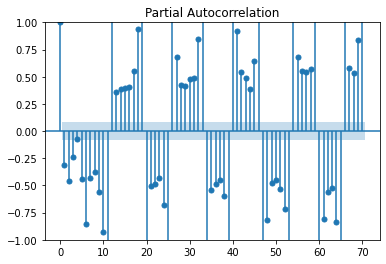

In [157]:
import statsmodels.graphics.tsaplots as sm_graph

sm_graph.plot_acf(sec_dif, lags= 70)
sm_graph.plot_pacf(sec_dif, lags = 70)

# **Modelos**

## **Train Test Split SKLearn**

In [158]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits = 10)
for train_index, test_index in tscv.split(df):
     df_train, df_test = df.iloc[train_index], df.iloc[test_index]
     print(df_train)
df.iloc[-30:]

            obitos
data              
2020-03-17       1
2020-03-18       3
2020-03-19       2
2020-03-20       5
2020-03-21       7
...            ...
2020-05-12     881
2020-05-13     749
2020-05-14     844
2020-05-15     824
2020-05-16     816

[61 rows x 1 columns]
            obitos
data              
2020-03-17       1
2020-03-18       3
2020-03-19       2
2020-03-20       5
2020-03-21       7
...            ...
2020-07-05     602
2020-07-06     620
2020-07-07    1254
2020-07-08    1223
2020-07-09    1220

[115 rows x 1 columns]
            obitos
data              
2020-03-17       1
2020-03-18       3
2020-03-19       2
2020-03-20       5
2020-03-21       7
...            ...
2020-08-28     855
2020-08-29     958
2020-08-30     366
2020-08-31     553
2020-09-01    1215

[169 rows x 1 columns]
            obitos
data              
2020-03-17       1
2020-03-18       3
2020-03-19       2
2020-03-20       5
2020-03-21       7
...            ...
2020-10-21     566
2020-10-22     49

,obitos
data,
2021-10-09,404
2021-10-10,182
2021-10-11,202
2021-10-12,185
2021-10-13,176
2021-10-14,525
2021-10-15,570
2021-10-16,483
2021-10-17,130


## **Dividir Treino e Teste**

In [159]:
#Extrair tendencia, sazonalidade e residuo 
import pandas as pd
df = pd.read_csv('data/covid_br_obitos.csv', sep= ';')
df.set_index('data',inplace = True)
df = df[df['obitos']>0]
df = df.asfreq(freq= 'D')

df_train, df_test = df.iloc[:-30], df.iloc[-30:]

df_test.head(60)


,obitos
data,
2021-10-09,404
2021-10-10,182
2021-10-11,202
2021-10-12,185
2021-10-13,176
2021-10-14,525
2021-10-15,570
2021-10-16,483
2021-10-17,130


## **Alisamento Exponencial**

### **Simple**

<AxesSubplot:>

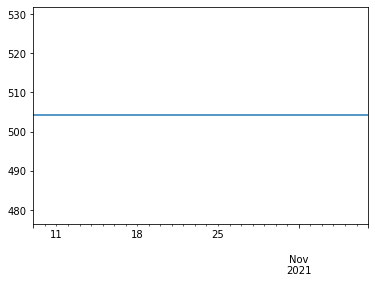

In [160]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
simp_smo = SimpleExpSmoothing(df_train)
simp_smo_fit = simp_smo.fit()
simp_smo_forecast = simp_smo_fit.forecast(30)
simp_smo_forecast.plot()

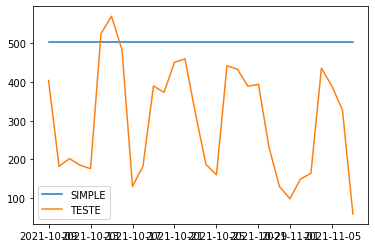

In [172]:
from matplotlib import pyplot as plt

plt.plot(simp_smo_forecast, label= 'SIMPLE')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Holt Winters Exponential Smoothing**


C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:>

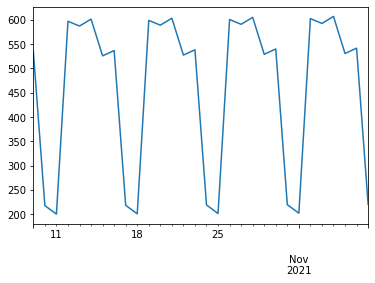

In [161]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smo = ExponentialSmoothing(df_train, trend= 'mul', seasonal= 'mul', seasonal_periods= 7, freq= 'D')
exp_smo_fit = exp_smo.fit()
exp_smo_forecast = exp_smo_fit.forecast(30)
exp_smo_forecast.plot()

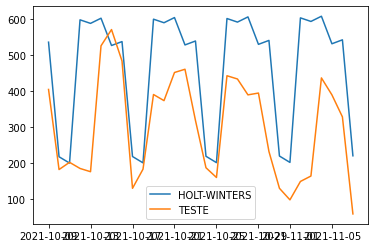

In [174]:
from matplotlib import pyplot as plt

plt.plot(exp_smo_forecast, label= 'HOLT-WINTERS')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Linear**

<AxesSubplot:>

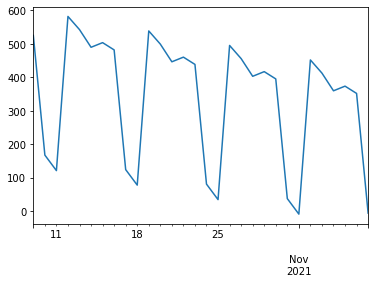

In [162]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

linear = ExponentialSmoothing(df_train, trend= True, seasonal=7)
linear_fit = linear.fit()
linear_forecast = linear_fit.forecast(30)
linear_forecast.plot()

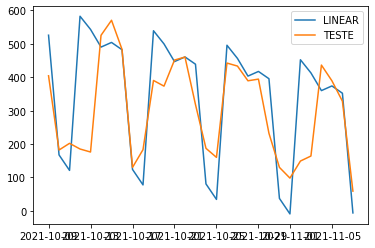

In [175]:
from matplotlib import pyplot as plt

plt.plot(linear_forecast, label= 'LINEAR')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **Holt**

C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:>

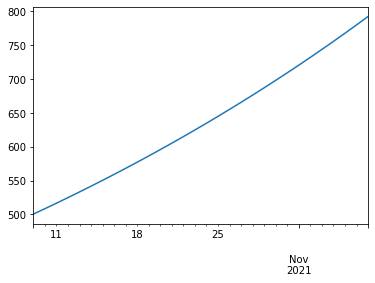

In [163]:
from statsmodels.tsa.holtwinters import Holt

holt = Holt(df_train, exponential = True)
holt_fit = holt.fit()
holt_forecast = holt_fit.forecast(30)
holt_forecast.plot()

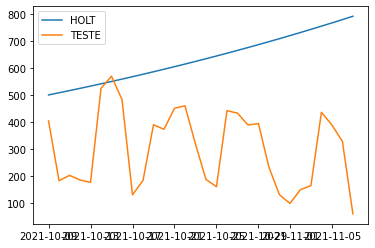

In [176]:
from matplotlib import pyplot as plt

plt.plot(holt_forecast, label= 'HOLT')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **ARIMA**

C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

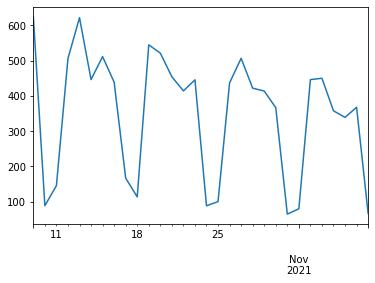

In [164]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(endog = df_train,order = (31,2,15), freq= 'D')
arima_fit = arima.fit()
arima_forecast = arima_fit.forecast(30)
arima_forecast.plot()

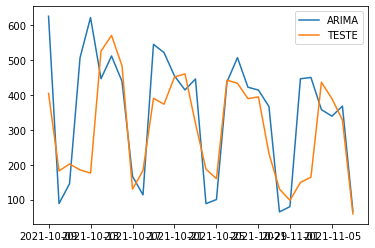

In [177]:
from matplotlib import pyplot as plt

plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

### **SARIMA**

C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lucas\.conda\envs\covid-time-series\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

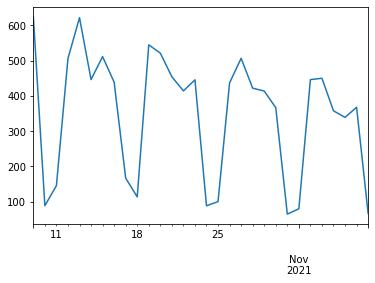

In [179]:
from statsmodels.tsa.arima.model import ARIMA

sarima = ARIMA(endog = df_train, seasonal_order = (31,2,15,7), freq= 'D')
sarima_fit = arima.fit()
sarima_forecast = arima_fit.forecast(30)
sarima_forecast.plot()

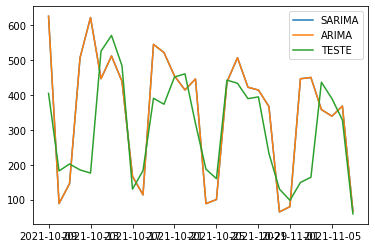

In [183]:
from matplotlib import pyplot as plt

plt.plot(sarima_forecast, label= 'SARIMA')
plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()

## **Gráficos**

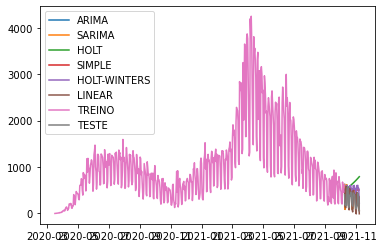

In [184]:
from matplotlib import pyplot as plt

plt.plot(arima_forecast, label= 'ARIMA')
plt.plot(sarima_forecast, label= 'SARIMA')
plt.plot(holt_forecast, label= 'HOLT')
plt.plot(simp_smo_forecast, label= 'SIMPLE')
plt.plot(exp_smo_forecast, label= 'HOLT-WINTERS')
plt.plot(linear_forecast, label= 'LINEAR')
plt.plot(df_train, label= 'TREINO')
plt.plot(df_test, label= 'TESTE')

plt.legend()
plt.show()